<a href="https://colab.research.google.com/github/guebin/DL2024/blob/main/posts/04wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

{{<video https://youtu.be/playlist?list=PLQqh36zP38-wD7Am2wZ7NNZjHpt55gwEH&si=Yj3LYi8Y9uU5SYtp >}}

# 2. Imports

In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from fastai.data.all import *
# import torchvision
# import pathlib

# 3. 꺽인그래프의 한계?

`-` 걱정: 지난시간에 배운 기술은 sig를 취하기 전이 꺽은선인 형태만 가능할 듯 하다. 그래서 이 역시 표현력이 부족할 듯 하다.

`-` 그런데 생각보다 표현력이 풍부한 편이다. 즉 생각보다 쓸 만하다.

## A. Step은 표현 불가능하지 않나?

`-` 맞춰봐

In [2]:
torch.manual_seed(43052)
x = torch.linspace(-1,1,2000).reshape(-1,1)
u = 0*x-3
u[x<-0.2] = (15*x+6)[x<-0.2]
u[(-0.2<x)&(x<0.4)] = (0*x-1)[(-0.2<x)&(x<0.4)]
sig = torch.nn.Sigmoid()
v = π = sig(u)
y = torch.bernoulli(v)

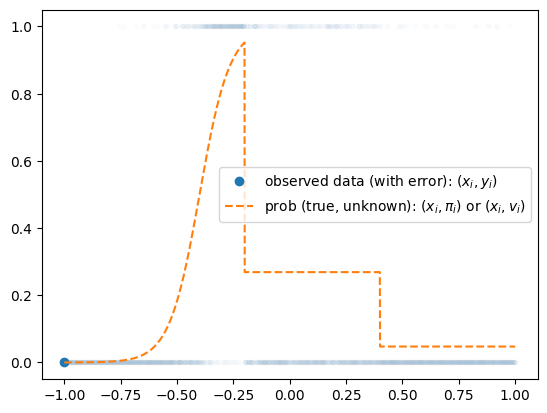

In [3]:
#plt.plot(u,alpha=0.2)
plt.plot(x,y,'.',alpha=0.01,color="C0")
plt.plot(x[0],y[0],'o',color="C0",label=r"observed data (with error): $(x_i,y_i)$")
plt.plot(x,v,'--',label=r"prob (true, unknown): $(x_i,\pi_i)$ or $(x_i,v_i)$",color="C1")
plt.legend()

`-` 저 주황색 구조를 어떻게 표현하지? $\to$ 선이 많이 꺽이면되는거아냐?

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,256)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,256)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$$

In [4]:
#torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(1,256),
    torch.nn.ReLU(),
    torch.nn.Linear(256,1),
    #torch.nn.Sigmoid()
)
#loss_fn = torch.nn.BCELoss()
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())
#--#
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

Text(0.5, 1.0, 'after sig')

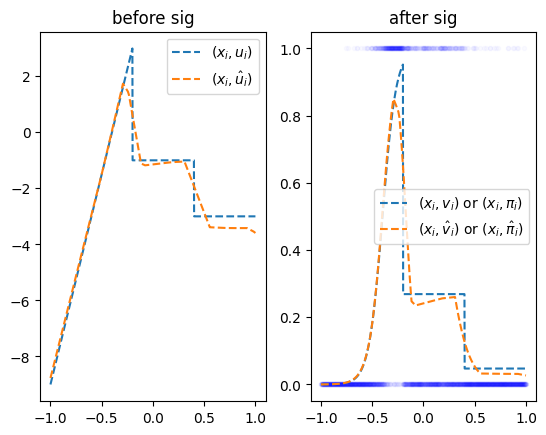

In [5]:
fig,ax = plt.subplots(1,2)
ax[0].plot(x,u,'--',label=r"$(x_i,u_i)$")
ax[0].plot(x,yhat.data,'--',label=r"$(x_i,\hat{u}_i)$")
ax[0].legend()
ax[0].set_title("before sig")
ax[1].plot(x,y,'.',alpha=0.02,color="blue")
ax[1].plot(x,v,'--', color="C0", label=r"$(x_i,v_i)$ or $(x_i,\pi_i)$")
ax[1].plot(x,sig(yhat.data),'--',color="C1",label=r"$(x_i,\hat{v}_i)$ or $(x_i,\hat{\pi}_i)$")
ax[1].legend()
ax[1].set_title("after sig")

## B. 곡선은 표현 불가능하지 않나?

`-` 맞춰봐^[2024년 수능 미적30번 문제에 나온 함수응용]

$$y_i = e^{-x_i} \times  |\cos(5x_i)| \times \sin(5x) + \epsilon_i, \quad \epsilon_i \sim N(0,\sigma^2)$$

In [6]:
torch.manual_seed(43052)
x = torch.linspace(0,2,2000).reshape(-1,1)
eps = torch.randn(2000).reshape(-1,1)*0.05
fx = torch.exp(-1*x)* torch.abs(torch.cos(3*x))*(torch.sin(3*x))
y = fx + eps

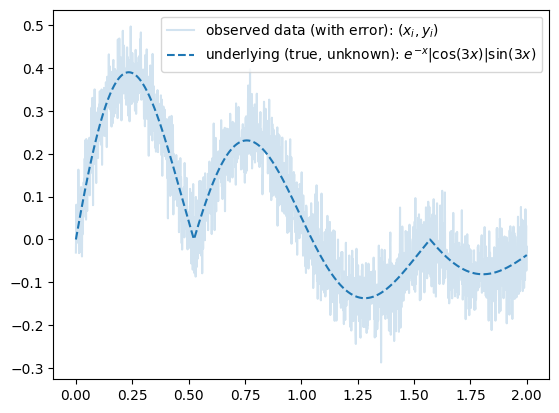

In [7]:
plt.plot(x,y,label=r"observed data (with error): $(x_i,y_i)$", alpha=0.2)
plt.plot(x,fx,'--',color="C0",label=r"underlying (true, unknown): $e^{-x}|\cos(3x)|\sin(3x)$")
plt.legend()

`-` 맞춰본다..

-   $\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,1024)}{\boldsymbol u^{(1)}} \overset{a_1}{\to} \underset{(n,1024)}{\boldsymbol v^{(1)}} \overset{l_1}{\to} \underset{(n,1)}{\boldsymbol u^{(2)}} \overset{a_2}{\to} \underset{(n,1)}{\boldsymbol v^{(2)}}=\underset{(n,1)}{\hat{\boldsymbol y}}$

In [8]:
#torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(1,1024),
    torch.nn.ReLU(),
    torch.nn.Linear(1024,1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#--#
for epoc in range(5000):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

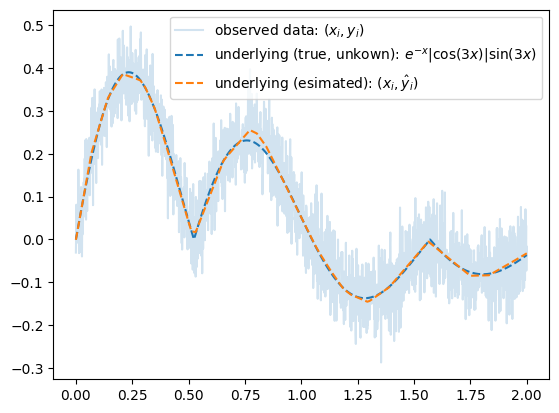

In [9]:
plt.plot(x,y,label=r"observed data: $(x_i,y_i)$", alpha=0.2)
plt.plot(x,fx,'--',color="C0",label=r"underlying (true, unkown): $e^{-x}|\cos(3x)|\sin(3x)$")
plt.plot(x,yhat.data,'--',color="C1",label=r"underlying (esimated): $(x_i,\hat{y}_i)$")
plt.legend()

# 4. 시벤코정리

## A. 시벤코의 정리 소개

::: {.callout-note}
### Universal Approximation Thm [@cybenko1989approximation]

하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크 $net: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$는

```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(),
    torch.nn.Linear(???,q)
)
```

모든 continuous mapping

$$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$$

를 원하는 정확도로 "근사"시킬 수 있다. 쉽게 말하면 ${\bf X} \to {\bf y}$ 인 어떠한 복잡한 규칙라도 하나의 은닉층을 가진 심층신경망(DNN)이 원하는 정확도로 근사시킨다는 의미이다. 예를들면 심층신경망은 아래와 같은 문제를 해결할 수 있다.

- ${\bf X}$는 토익점수, GPA, 공모전참가여부, ${\bf y}$는 취업여부일 경우 ${\bf X} \to {\bf y}$인 규칙을 심층신경망은 항상 찾을 수 있다.
- ${\bf X}$는 주택이미지, 지역정보, 주택면적, 주택에 대한 설명 ${\bf y}$는 주택가격일 경우 ${\bf X} \to {\bf y}$인 규칙을 심층신경망은 항상 찾을 수 있다.

즉 하나의 은닉층을 가진 심층신경망 모델의 표현력은 무한대라 볼 수 있다.
:::



## B. 왜 가능한가?

`-` 데이터

In [10]:
x = torch.linspace(-10,10,200).reshape(-1,1)

`-` 아래와 같은 네트워크를 고려하자. (스펙올라도 취업못하는 예제에서 썼던 네크워크랑 비슷해요)

In [11]:
l1 = torch.nn.Linear(in_features=1,out_features=2)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(in_features=2,out_features=1)

`-` 직관1: $l_1$,$l_2$의 가중치를 잘 결합하다보면 우연히 아래와 같이 만들 수 있다.

In [12]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+10.00,+10.00])

In [13]:
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])

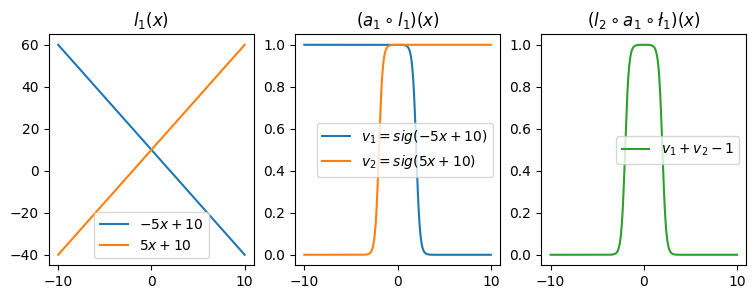

In [14]:
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x)[:,[0]].data,label=r"$-5x+10$")
ax[0].plot(x,l1(x)[:,[1]].data,label=r"$5x+10$")
ax[0].set_title('$l_1(x)$')
ax[0].legend()
ax[1].plot(x,a1(l1(x))[:,[0]].data,label=r"$v_1=sig(-5x+10)$")
ax[1].plot(x,a1(l1(x))[:,[1]].data,label=r"$v_2=sig(5x+10)$")
ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[1].legend()
ax[2].plot(x,l2(a1(l1(x))).data,color='C2',label=r"$v_1+v_2-1$")
ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$')
ax[2].legend()

`-` 직관2: 아래들도 가능할듯?

(-0.1, 2.6)

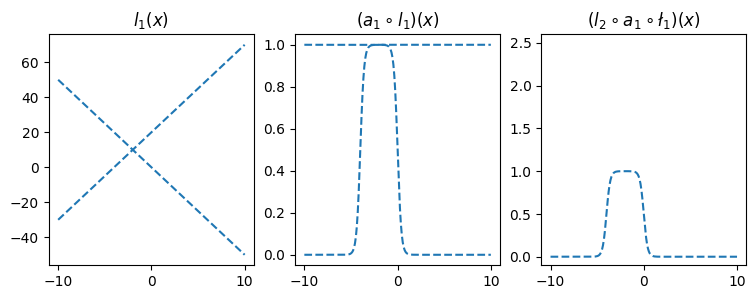

In [15]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+0.00,+20.00])
l2.weight.data = torch.tensor([[1.00,1.00]])
l2.bias.data = torch.tensor([-1.00])
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data.numpy(),'--',color='C0'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data.numpy(),'--',color='C0'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C0'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');
ax[2].set_ylim(-0.1,2.6)

(-0.1, 2.6)

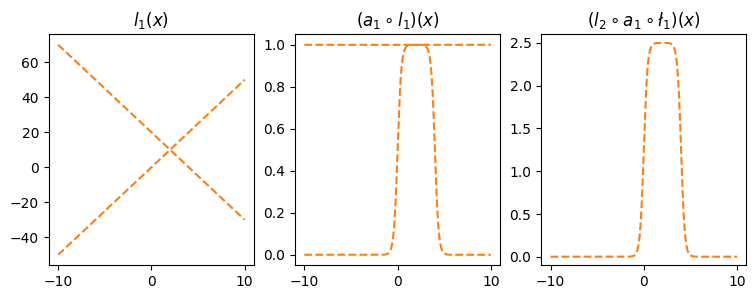

In [16]:
l1.weight.data = torch.tensor([[-5.00],[5.00]])
l1.bias.data = torch.tensor([+20.00,+00.00])
l2.weight.data = torch.tensor([[2.50,2.50]])
l2.bias.data = torch.tensor([-2.50])
fig,ax = plt.subplots(1,3,figsize=(9,3))
ax[0].plot(x,l1(x).data.numpy(),'--',color='C1'); ax[0].set_title('$l_1(x)$')
ax[1].plot(x,a1(l1(x)).data.numpy(),'--',color='C1'); ax[1].set_title('$(a_1 \circ l_1)(x)$')
ax[2].plot(x,l2(a1(l1(x))).data,'--',color='C1'); ax[2].set_title('$(l_2 \circ a_1 \circ \l_1)(x)$');
ax[2].set_ylim(-0.1,2.6)

`-` 직관3: `은닉층의노드수=4`로 하고 적당한 가중치를 조정하면 $(l_2\circ a_1 \circ l_1)(x)$의 결과로 주황색선 + 파란색선도 가능할 것 같다. $\to$ 실제로 가능함

In [17]:
l1 = torch.nn.Linear(in_features=1,out_features=4)
a1 = torch.nn.Sigmoid()
l2 = torch.nn.Linear(in_features=4,out_features=1)

In [18]:
l1.weight.data = torch.tensor([[-5.00],[5.00],[-5.00],[5.00]])
l1.bias.data = torch.tensor([0.00, 20.00, 20.00, 0])
l2.weight.data = torch.tensor([[1.00,  1.00, 2.50,  2.50]])
l2.bias.data = torch.tensor([-1.0-2.5])

Text(0.5, 1.0, '$(l_2 \\circ a_1 \\circ l_1)(x)$')

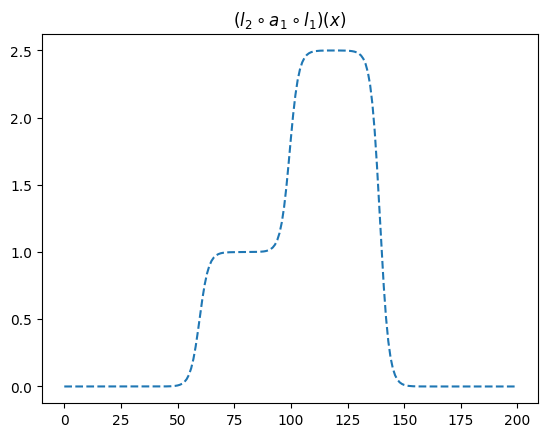

In [19]:
plt.plot(l2(a1(l1(x))).data,'--')
plt.title(r"$(l_2 \circ a_1 \circ l_1)(x)$")

> 이러한 함수는 계단모양이며, 0을 제외한 서로다른 계단의 높이는 2개가 된다. 이를 간단히 "2단계-계단함수"라고 칭하자.

`-` 정리1: 2개의 시그모이드를 우연히 잘 결합하면 아래와 같은 "1단계-계단함수" 함수 $h$를 만들 수 있다.

In [20]:
h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0

Text(0.5, 1.0, '$h(x)$')

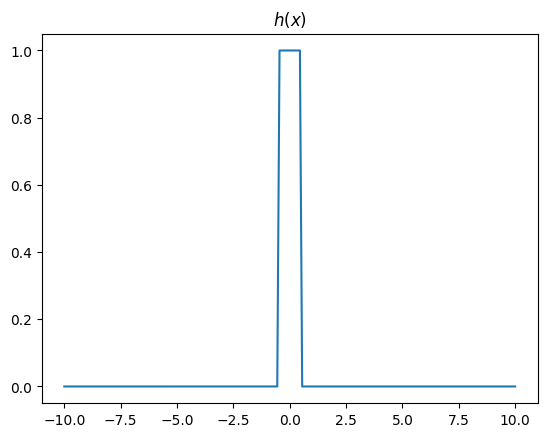

In [21]:
plt.plot(x,h(x))
plt.title("$h(x)$")

`-` 정리2: 위와 같은 함수 $h$를 활성화함수로 하고 $m$개의 노드를 가지는 은닉층을 생각해보자. 이러한 은닉층을 사용한다면 "m단계-계단함수"와 같은 형태의 네트워크는 아래와 같이 $m$개의 은닉노드를 써서 항상 표현할 수 있다.

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$$

그리고 위의 네트워크와 동일한 효과를 주는 아래의 네트워크가 항상 존재함.

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,2m)}{\boldsymbol u^{(1)}} \overset{sig}{\to} \underset{(n,2m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$$

`-` 직관4: 그런데 어떠한 함수형태라도 구불구불한 "m단계-계단함수"로 다 근사할 수 있지 않나?

## C. $h$의 위력

`-` $h(x)$를 생성하는 클래스를 만들어보자.

In [22]:
class MyActivation(torch.nn.Module): ## 사용자정의 활성화함수를 선언하는 방법
    def __init__(self):
        super().__init__()
    def forward(self, u):
        h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0
        v = h(u)
        return v # activation 의 출력

In [23]:
a1 = MyActivation()
# a1 = torch.nn.Sigmoid(), a1 = torch.nn.ReLU() 대신에 a1 = MyActivation()

`-` 아래와 같이 하나의 은닉층을 가지고 있더라도 많은 노드수만 보장되면 매우 충분한 표현력을 가짐

$$\underset{(n,1)}{\bf X} \overset{l_1}{\to} \underset{(n,m)}{\boldsymbol u^{(1)}} \overset{h}{\to} \underset{(n,m)}{\boldsymbol v^{(1)}} \overset{l_2}{\to} \underset{(n,1)}{\hat{\boldsymbol y}}$$

`-` $h$의 위력

**예제1** -- 스펙높아도 취업이 안된다고??

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DL2024/main/posts/dnnex.csv")
x = torch.tensor(df.x).float().reshape(-1,1)
y = torch.tensor(df.y).float().reshape(-1,1)
prob = torch.tensor(df.prob).float().reshape(-1,1)

In [25]:
torch.manual_seed(43052)
class MyActivation(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, u):
        h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0
        v = h(u)
        return v
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    MyActivation(),
    torch.nn.Linear(2048,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(100):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

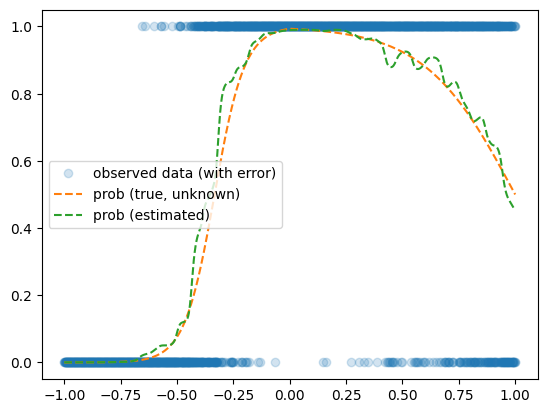

In [26]:
plt.plot(x,y,'o',alpha=0.2, label="observed data (with error)")
plt.plot(x,prob,'--', label="prob (true, unknown)")
plt.plot(x,net(x).data,'--',label="prob (estimated)")
plt.legend()

**예제2** -- 수능에 나왔다던 이상한 곡선..?

In [27]:
torch.manual_seed(43052)
x = torch.linspace(0,2,2000).reshape(-1,1)
eps = torch.randn(2000).reshape(-1,1)*0.05
fx = torch.exp(-1*x)* torch.abs(torch.cos(3*x))*(torch.sin(3*x))
y = fx + eps

In [28]:
torch.manual_seed(43052)
class MyActivation(torch.nn.Module):
    def __init__(self):
        super().__init__()
    def forward(self, u):
        h = lambda x: torch.sigmoid(200*(x+0.5))+torch.sigmoid(-200*(x-0.5))-1.0
        v = h(u)
        return v
#---#
net = torch.nn.Sequential(
    torch.nn.Linear(1,2048),
    MyActivation(),
    torch.nn.Linear(2048,1),
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())
#---#
for epoc in range(100):
    ## 1
    yhat = net(x)
    ## 2
    loss = loss_fn(yhat,y)
    ## 3
    loss.backward()
    ## 4
    optimizr.step()
    optimizr.zero_grad()

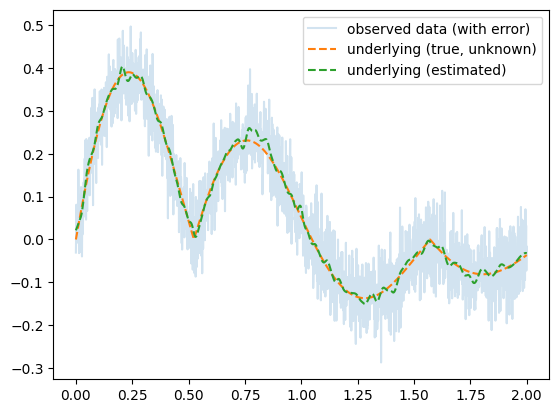

In [29]:
plt.plot(x,y,alpha=0.2,label="observed data (with error)")
plt.plot(x,fx,'--',label="underlying (true, unknown)")
plt.plot(x,net(x).data,'--',label="underlying (estimated)")
plt.legend()

## D. 의문점

`-` 이 수업을 잘 이해한 사람: 그냥 활성화함수를 $h$로 쓰면 끝 아니야? 뭐하러 relu 를 쓰는거지?

`-` 딥러닝을 좀 공부해본사람1: 왜 딥러닝이 2010년이 지나서야 떳지? 1989년에 세상의 모든 문제가 풀려야 하는것 아닌가?

`-` 딥러닝을 좀 공부해본사람2: 하나의 은닉층을 표현하는 네크워크는 잘 안쓰지 않나? 은닉층이 많을수록 좋다고 들었는데?

`-` 약간의 의구심이 있지만 아무튼 우리는 아래의 무기를 가진 꼴이 되었다.

::: {.callout-tip}
### 우리의 무기

하나의 은닉층을 가지는 아래와 같은 꼴의 네트워크로,
```Python
net = torch.nn.Sequential(
    torch.nn.Linear(p,???),
    torch.nn.Sigmoid(),
    torch.nn.Linear(???,q)
)
```

$f: {\bf X}_{n \times p} \to {\bf y}_{n\times q}$ 인 모든 continuous mapping $f$ 을 원하는 정확도로 "근사"시킬 수 있다.
:::



# 5. MNIST 해결

## A. 데이터 다운로드

In [30]:
from fastai.data.all import *

In [31]:
untar_data('https://s3.amazonaws.com/fast-ai-imageclas/mnist_png.tgz')

Path('/root/.fastai/data/mnist_png')

In [32]:
!ls '/root/.fastai/data/mnist_png'

testing  training


In [33]:
!ls '/root/.fastai/data/mnist_png/training/'

0  1  2  3  4  5  6  7	8  9


In [34]:
!ls '/root/.fastai/data/mnist_png/training/3' | head

10000.png
10011.png
10031.png
10034.png
10042.png
10052.png
10074.png
1007.png
10091.png
10093.png


In [35]:
import torchvision

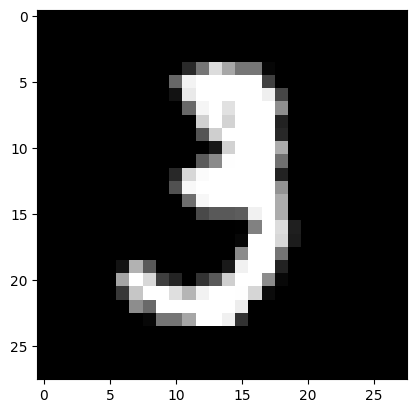

In [36]:
img3 = torchvision.io.read_image('/root/.fastai/data/mnist_png/training/3/10.png')
plt.imshow(img3.reshape(28,28),cmap="gray")

## B. 예비학습 -- ``plt.imshow()`

`-` `plt.imshow(...)` 에서 `...`이 shape이 (??,??)이면 흑백이미지를 출력

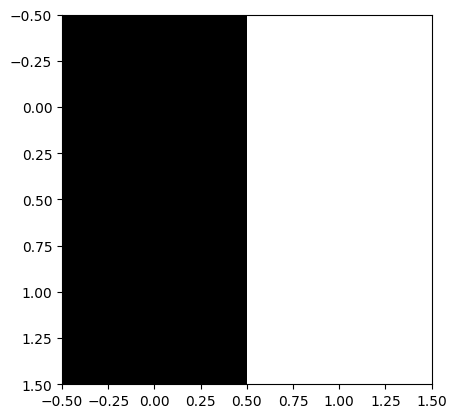

In [37]:
plt.imshow([[0,255],[0,255]],cmap='gray')

`-` `plt.imshow(...)` 에서 `...`의 shape이 (??,??,3)이면 칼라이미지를 출력

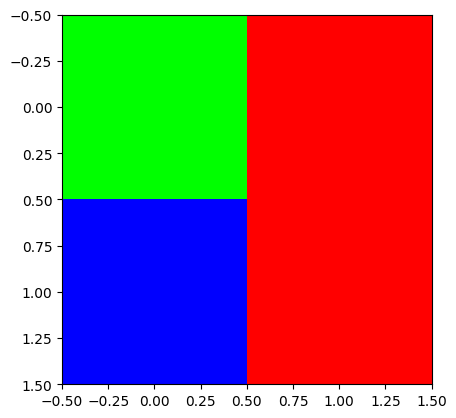

In [38]:
r = [[0,255],[0,255]]
g = [[255,0],[0,0]]
b = [[0,0],[255,0]]
plt.imshow(np.stack([r,g,b],axis=2))

`-` `plt.imshow(...)` 에서 `...`의 자료형이 int인지 float인지에 따라서 인식이 다름

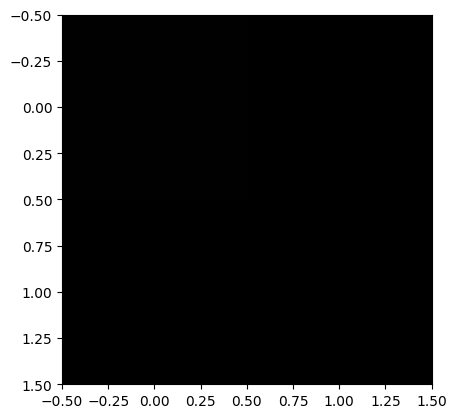

In [39]:
r = [[0,1],[0,1]]
g = [[1,0],[0,0]]
b = [[0,0],[1,0]]
plt.imshow(np.stack([r,g,b],axis=2))

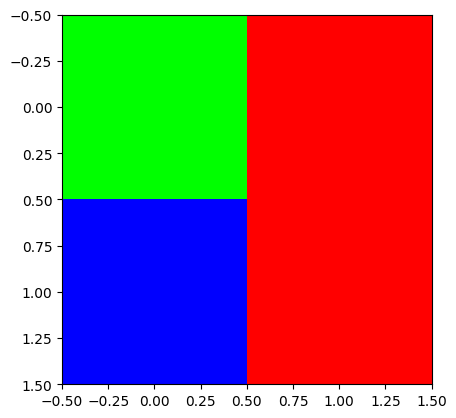

In [40]:
r = [[0,1.0],[0,1.0]]
g = [[1.0,0],[0,0]]
b = [[0,0],[1.0,0]]
plt.imshow(np.stack([r,g,b],axis=2))

## C. 예비학습 -- pathlib

In [41]:
import pathlib

`-` 오브젝트 생성

In [42]:
path = pathlib.Path('.')
path

Path('.')

`-` 기능1 -- `.ls()`

In [43]:
path.ls()

(#2) [Path('.config'),Path('sample_data')]

`-` 이미지 파일이 저장된 경로로 새로운 `path`오브젝트를 만들고 기능1 수행

In [44]:
path = pathlib.Path('/root/.fastai/data/mnist_png')
path

Path('/root/.fastai/data/mnist_png')

In [45]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

`-` 기능2: `/` 로 새로운 path 생성하기

In [46]:
(path / 'training')

Path('/root/.fastai/data/mnist_png/training')

`-` 기능1,2의 결합

In [47]:
(path / 'training').ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/5'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/3')]

## D. 데이터정리

`-` 데이터가 저장된 path 설정

In [48]:
path = pathlib.Path('/root/.fastai/data/mnist_png')

`-` `X` ,`y`를 만듦

In [49]:
X3 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'training/3').ls()],axis=0)
X7 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'training/7').ls()],axis=0)

In [50]:
X3.shape, X7.shape

(torch.Size([6131, 1, 28, 28]), torch.Size([6265, 1, 28, 28]))

In [51]:
y = torch.tensor([0.0]*6131+[1.0]*6265).reshape(-1,1)

In [52]:
X = torch.concat([X3,X7],axis=0)
X.shape

torch.Size([12396, 1, 28, 28])

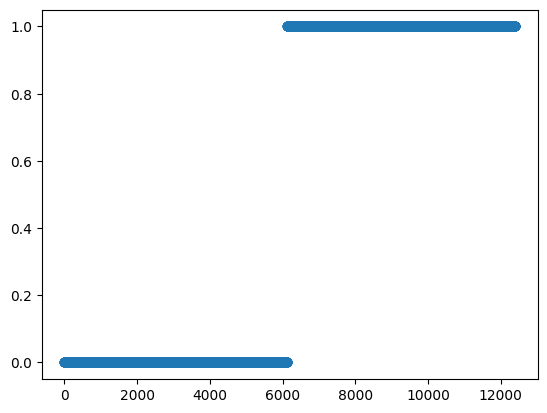

In [53]:
plt.plot(y,'o')

- "y=0.0" 은 숫자3을 의미함, "y=1.0" 은 숫자7을 의미함
- 숫자3은 6131개, 숫자7은 6265개 있음

`-` 우리는 ${\bf X}: (n,1,28,28)$ 에서 ${\bf y}: (n,1)$으로 가는 맵핑을 배우고 싶음. $\to$ 이런건 배운적이 없는데?.. $\to$ 그렇다면 ${\bf X}:(n,784) \to {\bf y}:(n,1)$ 으로 가는 맵핑을 학습하자.

In [54]:
X = torch.concat([X3,X7],axis=0).reshape(-1,28*28).float()
X.shape, y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

## E. 학습

In [55]:
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#--#
for epoc in range(200):
    ## step1
    yhat = net(X)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()

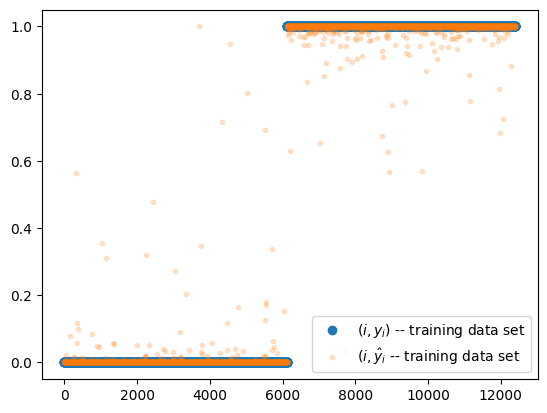

In [56]:
plt.plot(y,'o',label=r"$(i,y_i)$ -- training data set")
plt.plot(net(X).data,'.',alpha=0.2, label=r"$(i,\hat{y}_i$ -- training data set")
plt.legend()

- 잘맞추는데?
- 믿을수가 없는데..?

In [57]:
((yhat.data > 0.5) == y).float().mean() # train_accuracy

tensor(0.9994)

## F. Test

In [58]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [59]:
XX3 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'testing/3').ls()],axis=0)
XX7 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'testing/7').ls()],axis=0)

In [60]:
XX3.shape,XX7.shape

(torch.Size([1010, 1, 28, 28]), torch.Size([1028, 1, 28, 28]))

In [61]:
XX = torch.concatenate([XX3,XX7],axis=0).reshape(-1,1*28*28).float()
XX.shape

torch.Size([2038, 784])

In [62]:
yy = torch.tensor([0]*1010 + [1]*1028).reshape(-1,1).float()
yy.shape

torch.Size([2038, 1])

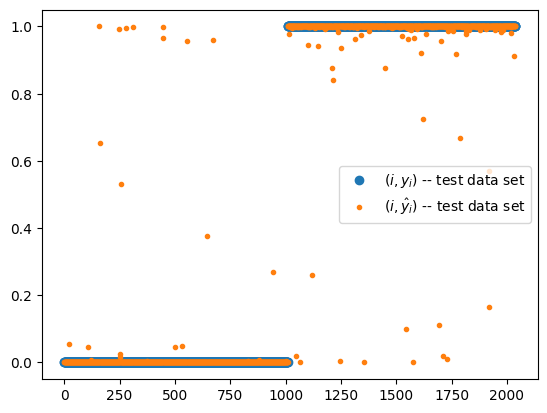

In [63]:
plt.plot(yy,'o',label=r"$(i,y_i)$ -- test data set")
plt.plot(net(XX).data,'.',label=r"$(i,\hat{y}_i)$ -- test data set")
plt.legend()

In [64]:
(yy == (net(XX)>0.5)).float().mean() # test accuracy

tensor(0.9897)

- test 에서도 잘 맞춘다..

# 6. HW

`# 5. MNIST 해결 -- E. 학습` 에 소개된 학습코드는 아래와 같다.

```Python
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
    torch.nn.Sigmoid()
)
loss_fn = torch.nn.BCELoss()
optimizr = torch.optim.Adam(net.parameters())
#--#
for epoc in range(200):
    ## step1
    yhat = net(X)
    ## step2
    loss = loss_fn(yhat,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()
```

이 코드에 사용된 네트워크를 아래와 같이 변형하고, 적절한 `loss_fn` 을 다시 정의하여 학습하라.

```Python
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1)
    #torch.nn.Sigmoid()
)
```

학습결과를 확인하고 accuracy를 구하라.

(풀이)

In [46]:
## Step1 
path = pathlib.Path('root/.fastai/data/mnist_png')
X3 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'training/3').ls()],axis=0)
X7 = torch.stack([torchvision.io.read_image(str(i)) for i in (path/'training/7').ls()],axis=0)
X = torch.concat([X3,X7],axis=0).reshape(-1,28*28).float()
y = torch.tensor([0.0]*6131+[1.0]*6265).reshape(-1,1)
## Step2 
torch.manual_seed(43052)
net = torch.nn.Sequential(
    torch.nn.Linear(784,32),
    torch.nn.ReLU(),
    torch.nn.Linear(32,1),
)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizr = torch.optim.Adam(net.parameters())
## Step3 
for epoc in range(200):
    ## step1
    netout = net(X)
    ## step2
    loss = loss_fn(netout,y)
    ## step3
    loss.backward()
    ## step4
    optimizr.step()
    optimizr.zero_grad()
## Step4 
sig = torch.nn.Sigmoid()
print(f'acc(방법1) = {((sig(netout) > 0.5) == y).float().mean()}')
print(f'acc(방법2) = {((netout>0) == y).float().mean()}')

acc(방법1) = 0.999515950679779
acc(방법2) = 0.999515950679779


- 두번째 방법은 시그모이드 취하기전의 값이 0보다 커야, 시그모이드를 취한 값이 0.5 이상이 됨을 이용한 것이다. (참고로 시그모이드 취하기 전의 값이 딱 0이라면 시그모이드를 취한값은 0.5가 된다) 즉 $netout>0 \Leftrightarrow sig(netout)>0.5$를 이용한 것임.


